In [1]:
#import necessary library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
data = pd.read_csv('glassdoor job posting test 14Oct20.csv')

In [4]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Scientist Engineer,-1,"Date: Oct 13, 2020\n\nEricsson Country Unit: I...",4.0,Ericsson-Worldwide\n4.0,Jakarta,10000+ Employees,1876,Company - Public,Telecommunications Services,Telecommunications,$10+ billion (USD)
1,Big Data & Analytics Consultant,-1,Are you passionate about analytics? Would you ...,3.9,Amazon\n3.9,Jakarta,10000+ Employees,1994,Company - Public,Internet,Information Technology,$10+ billion (USD)
2,Data Scientist,-1,HappyFresh is Southeast Asia's #1 Online Groce...,4.3,HappyFresh\n4.3,Jakarta,201 to 500 Employees,2014,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
3,Data Scientist,-1,Understand business problems and recommend sol...,3.7,DBS Bank\n3.7,Indonesia,10000+ Employees,1968,Company - Public,Banks & Credit Unions,Finance,$5 to $10 billion (USD)
4,Data Scientist,-1,"Define problems and hypotheses, develop recomm...",4.1,Tiket.com (PT. Global Tiket Network)\n4.1,Jakarta,51 to 200 Employees,2011,Company - Private,Travel Agencies,Travel & Tourism,$25 to $50 million (USD)


In [5]:
#fetch the all columns name
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue'],
      dtype='object')

In [6]:
#check the value counts in each columns
for i in data.columns:
    if i != 'Job Description':
        print('-->',i)
        print('-'*10)
        print(data[i].value_counts())
        print('*'*80)

--> Job Title
----------
Data Analyst                                             31
Data Engineer                                            13
Data Scientist                                           13
Senior Data Scientist                                     5
Lead Data Scientist                                       4
                                                         ..
Sr. Data Analyst - Finance                                1
Data Scientist - JID                                      1
Junior Data Analyst                                       1
Underwriting Senior Data Analyst (up to AVP/VP Level)     1
Business Intelligence Analyst - GoPay                     1
Name: Job Title, Length: 76, dtype: int64
********************************************************************************
--> Salary Estimate
----------
-1    150
Name: Salary Estimate, dtype: int64
********************************************************************************
--> Rating
----------
-1.0    52
 

In [7]:
#drop the Salary Estimate column and rename others since it's contain white space.
data.drop(['Salary Estimate'], axis = 1, inplace = True)

data.rename({'Job Title':'job_title', 
             'Job Description':'job_description', 
             'Rating':'rating',
             'Company Name':'company_name', 
             'Location':'location', 
             'Size':'size', 
             'Founded':'founded', 
             'Type of ownership':'type_of_ownership',
             'Industry':'industry', 
             'Sector':'sector', 
             
             
             'Revenue':'revenue'},axis = 1, inplace = True)

In [8]:
#company name column contain name of company and rating saperated by \n
#saperate company name and remove rating 
data['company_name'] = data['company_name'].apply(lambda x : str(x).split('\n')[0])

In [9]:
#number of employee working in compnay
data['size'].unique()

array(['10000+ Employees', '201 to 500 Employees', '51 to 200 Employees',
       '-1', '5001 to 10000 Employees', '1001 to 5000 Employees',
       '1 to 50 Employees', 'Unknown', '501 to 1000 Employees'],
      dtype=object)

In [10]:
data['size'] = data['size'].map({'10000+ Employees':10000,
                                 '201 to 500 Employees':500,
                                 '51 to 200 Employees':200,
                                 '-1':np.nan,
                                 '5001 to 10000 Employees':10000, 
                                 '1001 to 5000 Employees':5000,
                                 '1 to 50 Employees':50,
                                 'Unknown':np.nan, 
                                 '501 to 1000 Employees':1000})

In [11]:
#replace -1 with NaN values
data.replace(-1,np.nan,inplace = True)
data.replace('-1',np.nan,inplace = True)

In [12]:
#checking null values 
data.isna().sum()

job_title              0
job_description        0
rating                52
company_name           0
location               0
size                  47
founded              108
type_of_ownership     41
industry              86
sector                86
revenue               41
dtype: int64

In [13]:
#replace Company - Public to public and Company - Private to private
data['type_of_ownership'] = data['type_of_ownership'].replace({'Company - Public':'public','Company - Private':'private'})

In [14]:
#replace revenue column with integer values 
data['revenue'] = data['revenue'].map({'Less than $1 million (USD)':1000000,
                                       'Unknown / Non-Applicable':np.nan,
                                       '$500 million to $1 billion (USD)':1000000000,
                                        '$10 to $25 million (USD)':25000000,
                                        '$10+ billion (USD)':10000000000,
                                        '$2 to $5 billion (USD)':5000000000,
                                        '$5 to $10 million (USD)':10000000,
                                        '$25 to $50 million (USD)':50000000,
                                        '$1 to $5 million (USD)':5000000,
                                        '$50 to $100 million (USD)':100000000,
                                        '$5 to $10 billion (USD)':10000000000,
                                        '$1 to $2 billion (USD)':2000000000,
                                        '$100 to $500 million (USD)':500000000})

In [15]:
#calculate how old company is?
data['age_of_company'] = 2020 - data['founded']

In [16]:
#get the information about data like type,null values, memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          150 non-null    object 
 1   job_description    150 non-null    object 
 2   rating             98 non-null     float64
 3   company_name       150 non-null    object 
 4   location           150 non-null    object 
 5   size               103 non-null    float64
 6   founded            42 non-null     float64
 7   type_of_ownership  109 non-null    object 
 8   industry           64 non-null     object 
 9   sector             64 non-null     object 
 10  revenue            83 non-null     float64
 11  age_of_company     42 non-null     float64
dtypes: float64(5), object(7)
memory usage: 14.2+ KB


<AxesSubplot:>

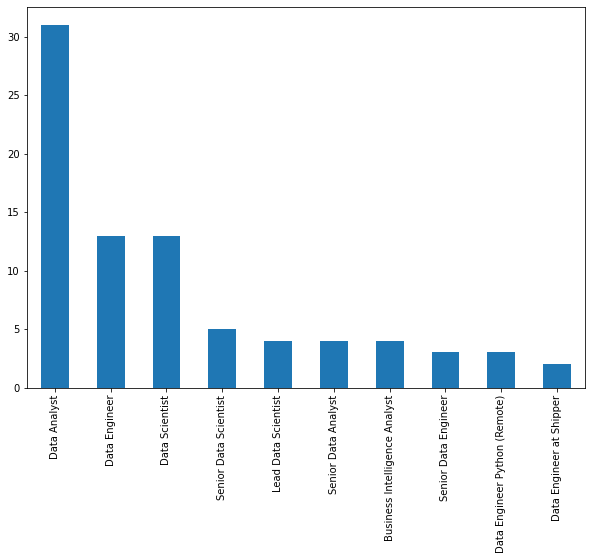

In [17]:
#top 10 job title
plt.figure(figsize=(10,7))
data['job_title'].value_counts().head(10).plot.bar()

<AxesSubplot:>

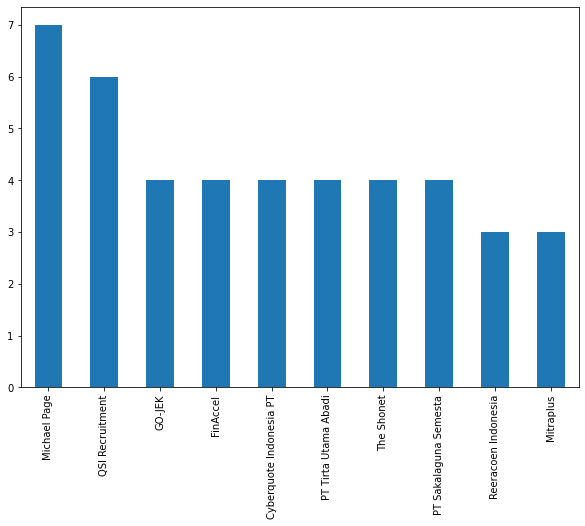

In [18]:
#top 10 recruiter company 
plt.figure(figsize=(10,7))
data['company_name'].value_counts().head(10).plot.bar()

<AxesSubplot:>

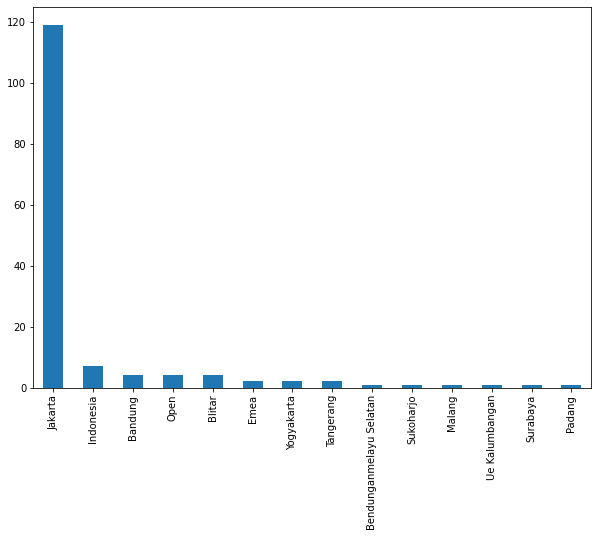

In [19]:
#top job location
plt.figure(figsize=(10,7))
data['location'].value_counts().plot.bar()

<AxesSubplot:>

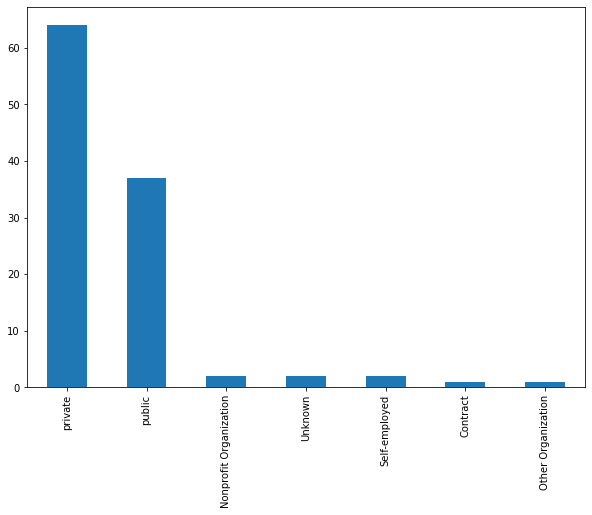

In [20]:
#types of ownerships of company
plt.figure(figsize=(10,7))
data['type_of_ownership'].value_counts().plot.bar()

<AxesSubplot:ylabel='sector'>

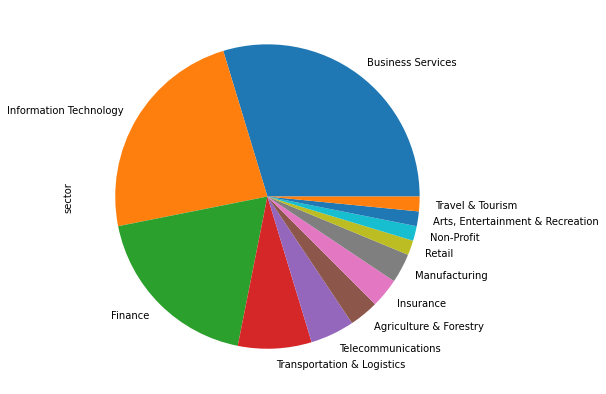

In [21]:
#sectors portion of total jobs 
plt.figure(figsize=(10,7))
data['sector'].value_counts().plot.pie()

<AxesSubplot:xlabel='age_of_company', ylabel='company_name'>

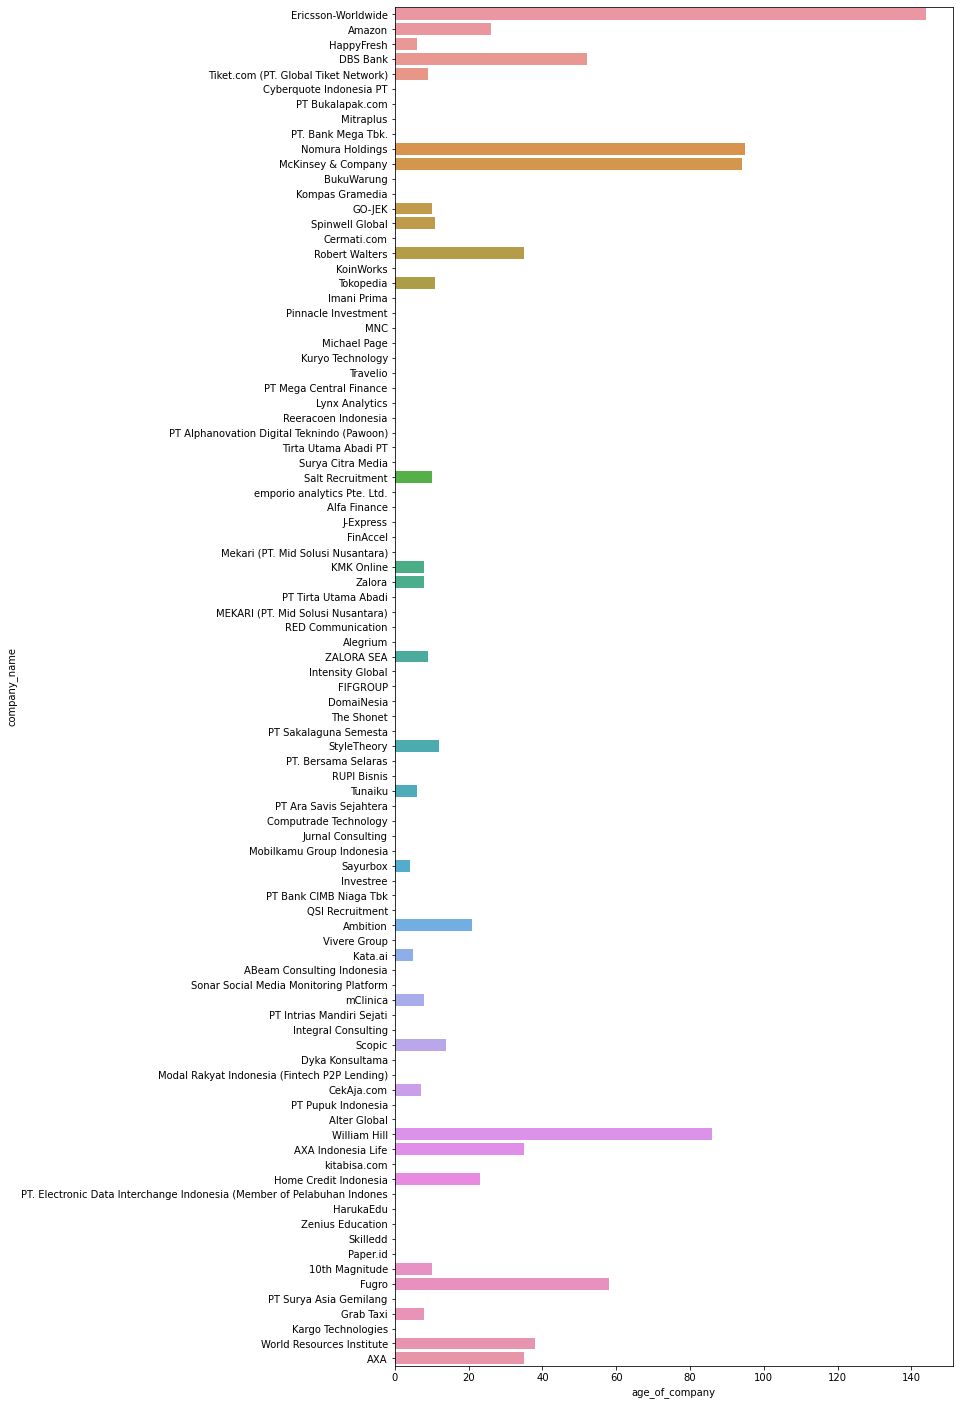

In [22]:
#visualization of how old organization 
plt.figure(figsize=(10,25))
sns.barplot(y='company_name',x='age_of_company',data=data)